# importing bibilio and data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import string

In [12]:
import csv
delimiter=":::"
data=pd.read_csv("dataset/train_data.csv",delimiter=":::",header=None)
print(data.describe())
print(data.info())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18560\4246125419.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("dataset/train_data.csv",delimiter=":::",header=None)


            0      1        2  \
count   54215  54215    54215   
unique  54215  54215       28   
top        ID    NOM   drama    
freq        1      1    13613   

                                                        3  
count                                               54215  
unique                                              54092  
top      Grammy - music award of the American academy ...  
freq                                                   12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54215 entries, 0 to 54214
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54215 non-null  object
 1   1       54215 non-null  object
 2   2       54215 non-null  object
 3   3       54215 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
None


In [13]:
print(data.isnull().sum())

0    0
1    0
2    0
3    0
dtype: int64


In [14]:
data.head(10)


,0,1,2,3
0,ID,NOM,GENRE,DESCRIPTION
1,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,"""6",Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""7","""""Pink Slip"""" (2009)",comedy,In tough economic times Max and Joey have all...
8,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""9","""""Desperate Hours"""" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."


my dataa neeed a header so i will give it a header so i can easly use it .
Observing that we have some types of films , so we will visualize some visualization about this datasset
 

In [15]:
mytrain_data=pd.read_csv("dataset/train_data.csv",delimiter=":::")
mytrain_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18560\325559705.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mytrain_data=pd.read_csv("dataset/train_data.csv",delimiter=":::")


,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Text(0, 0.5, 'genre')

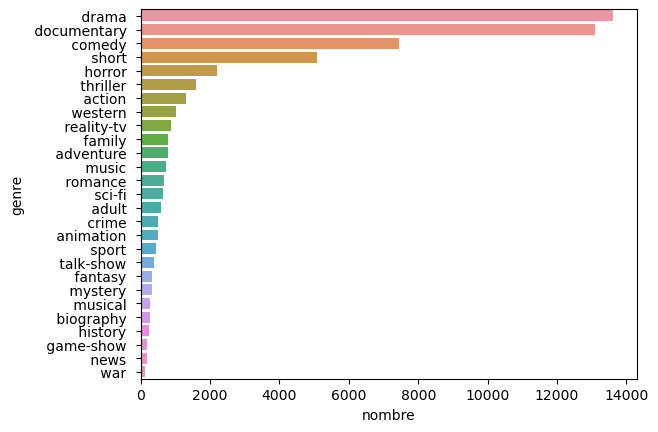

In [16]:
sns.countplot(data=mytrain_data,y="GENRE",order=mytrain_data['GENRE'].value_counts().index)
plt.xlabel("nombre")
plt.ylabel("genre")

now we begin our process, we will remove anything that not help us to use the data

In [17]:

mytrain_data['DESCRIPTION']=mytrain_data['DESCRIPTION'].str.lower()
def remove_punctuation(text):
    return text.str.replace('[{}]'.format(string.punctuation), '')

mytrain_data['DESCRIPTION'] = remove_punctuation(mytrain_data['DESCRIPTION'])
mytrain_data['DESCRIPTION']= mytrain_data['DESCRIPTION'].apply(lambda x:x.split())

we are now cleaning the data from any pounctuation , now we will clean it from stopwords that are not be needed in our process

In [20]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
mytrain_data['DESCRIPTION'] = mytrain_data['DESCRIPTION'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
mytrain_data.head(5)

,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,"[listening, conversation, doctor, parents,, 10..."
1,2,Cupid (1997),thriller,"[brother, sister, past, incestuous, relationsh..."
2,"""3","Young, Wild and Wonderful (1980)",adult,"[bus, empties, students, field, trip, museum, ..."
3,4,The Secret Sin (1915),drama,"[help, unemployed, father, make, ends, meet,, ..."
4,5,The Unrecovered (2007),drama,"[film's, title, refers, un-recovered, bodies, ..."


we see athat our data for now is words , so with thhis words we can begin the process

In [22]:
print(mytrain_data.shape)
mytest_data=pd.read_csv("dataset/test_data.txt",delimiter=":::")
mytest_data.head()
mytrain_data['length']=mytrain_data['DESCRIPTION'].apply(len)
mytrain_data.head()


(54214, 4)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18560\3951951557.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mytest_data=pd.read_csv("dataset/test_data.txt",delimiter=":::")


,ID,NOM,GENRE,DESCRIPTION,length
0,1,Oscar et la dame rose (2009),drama,"[listening, conversation, doctor, parents,, 10...",52
1,2,Cupid (1997),thriller,"[brother, sister, past, incestuous, relationsh...",16
2,"""3","Young, Wild and Wonderful (1980)",adult,"[bus, empties, students, field, trip, museum, ...",58
3,4,The Secret Sin (1915),drama,"[help, unemployed, father, make, ends, meet,, ...",111
4,5,The Unrecovered (2007),drama,"[film's, title, refers, un-recovered, bodies, ...",57


we can add some techniques like lemmatization , so we can know the source of the words


In [25]:
from nltk.stem import WordNetLemmatizer
if  nltk.download('wordnet'):
    print("Le modèle WordNet a été correctement installé.")
else:
    print("Le modèle WordNet n'est pas installé. Veuillez essayer de le télécharger.")

lemmatizer = WordNetLemmatizer()
mytrain_data['DESCRIPTION']=mytrain_data['DESCRIPTION'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Le modèle WordNet a été correctement installé.


In [29]:
mytrain_data['DESCRIPTION'].head(5)

0    [listening, conversation, doctor, parents,, 10...
1    [brother, sister, past, incestuous, relationsh...
2    [bus, empty, student, field, trip, museum, nat...
3    [help, unemployed, father, make, end, meet,, e...
4    [film's, title, refers, un-recovered, body, gr...
Name: DESCRIPTION, dtype: object

in classification we need classes so we can use this

In [30]:
mytrain_data = pd.get_dummies(mytrain_data, columns=['GENRE'])
print(mytrain_data.columns)
mytrain_data.head()

Index(['ID', 'NOM', 'DESCRIPTION', 'length', 'GENRE_ action ', 'GENRE_ adult ',
       'GENRE_ adventure ', 'GENRE_ animation ', 'GENRE_ biography ',
       'GENRE_ comedy ', 'GENRE_ crime ', 'GENRE_ documentary ',
       'GENRE_ drama ', 'GENRE_ family ', 'GENRE_ fantasy ',
       'GENRE_ game-show ', 'GENRE_ history ', 'GENRE_ horror ',
       'GENRE_ music ', 'GENRE_ musical ', 'GENRE_ mystery ', 'GENRE_ news ',
       'GENRE_ reality-tv ', 'GENRE_ romance ', 'GENRE_ sci-fi ',
       'GENRE_ short ', 'GENRE_ sport ', 'GENRE_ talk-show ',
       'GENRE_ thriller ', 'GENRE_ war ', 'GENRE_ western '],
      dtype='object')


,ID,NOM,DESCRIPTION,length,GENRE_ action,GENRE_ adult,GENRE_ adventure,GENRE_ animation,GENRE_ biography,GENRE_ comedy,...,GENRE_ news,GENRE_ reality-tv,GENRE_ romance,GENRE_ sci-fi,GENRE_ short,GENRE_ sport,GENRE_ talk-show,GENRE_ thriller,GENRE_ war,GENRE_ western
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parents,, 10...",52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",16,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,"""3","Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",58,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet,, e...",111,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,The Unrecovered (2007),"[film's, title, refers, un-recovered, body, gr...",57,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


in any projet we must know our data by seeing some figures to visualise the data

In [32]:
import matplotlib.pyplot as plt
genres=mytrain_data.columns[4:]#deleting the colums of id ,description..
genre_number=mytrain_data[genres].sum()
print(genre_number)

GENRE_ action           1315
GENRE_ adult             590
GENRE_ adventure         775
GENRE_ animation         498
GENRE_ biography         265
GENRE_ comedy           7447
GENRE_ crime             505
GENRE_ documentary     13096
GENRE_ drama           13613
GENRE_ family            784
GENRE_ fantasy           323
GENRE_ game-show         194
GENRE_ history           243
GENRE_ horror           2204
GENRE_ music             731
GENRE_ musical           277
GENRE_ mystery           319
GENRE_ news              181
GENRE_ reality-tv        884
GENRE_ romance           672
GENRE_ sci-fi            647
GENRE_ short            5073
GENRE_ sport             432
GENRE_ talk-show         391
GENRE_ thriller         1591
GENRE_ war               132
GENRE_ western          1032
dtype: int64


WE CAN DO THIS IN A FIGURE WITH MATPLOTLIB

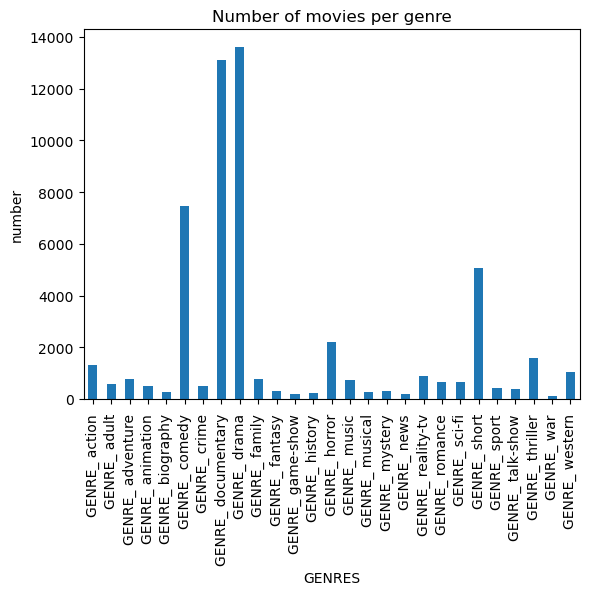

In [33]:
plt.xlabel("GENRES")
plt.ylabel("number")
plt.title('Number of movies per genre')
genre_number.plot(kind='bar')
plt.show()

In [35]:
test_data_solution=pd.read_csv("dataset/test_data_solution.txt",delimiter=":::",header=None)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18560\2056069710.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution=pd.read_csv("dataset/test_data_solution.txt",delimiter=":::",header=None)


In [36]:
Tfidf_Vectorizer=TfidfVectorizer()

matrix=Tfidf_Vectorizer.fit_transform(mytrain_data['DESCRIPTION'])

AttributeError: 'list' object has no attribute 'lower'